## ___Feature Encoding___

In many practical Data Science activities, the data set will contain categorical variables. These variables are typically stored as text values which represent various traits. Some examples include color (“Red”, “Yellow”, “Blue”), size (“Small”, “Medium”, “Large”) or geographic designations (State or Country). Regardless of what the value is used for, the challenge is determining how to use this data in the analysis. Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore, the analyst is faced with the challenge of figuring out how to turn these text attributes into numerical values for further processing.

As with many other aspects of the Data Science world, there is no single answer on how to approach this problem. Each approach has trade-offs and has potential impact on the outcome of the analysis. Fortunately, the python tools of pandas and scikit-learn provide several approaches that can be applied to transform the categorical data into suitable numeric values.

Categorical variable encoding is a broad term for collective techniques used to transform the strings or labels of categorical variables into numbers. There are multiple techniques under this method:

1. One-Hot Encoding (OHE)
2. Label Encoding
3. Ordinal Encoding
4. Count and Frequency encoding
5. Target encoding / Mean encoding
6. Weight of Evidence
7. Rare Label Encoding

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [6]:
!pip install kaggle

!mkdir .kaggle

import json
token = {"username":"piyushsingla","key":"94939b9ecb5fcbd1eb64911f57ee6087"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [5]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=6395c9412cfc0ca4bbfef91454168066801f5afb64e294113a3b43182908fe20
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [0]:
!chmod 600 /content/.kaggle/kaggle.json

In [7]:
!kaggle config set -n path -v{/content}
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

- path is now set to: {/content}


In [8]:
!kaggle competitions download -c titanic -p /content

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.3MB/s]


In [9]:
# let's load the titanic dataset

data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### ___One-Hot Encoding (OHE)___

OHE is the standard approach to encode categorical data.**One-Hot-Encoding** or **One-Out-of-N Encoding**, also known as **Dummy Variables** creates a binary variable for each one of the different categories present in a variable. 

These binary variables take 1 if the observation shows a certain category or 0 otherwise. OHE is suitable for linear models. But, OHE expands the feature space quite dramatically if the categorical variables are highly cardinal, or if there are many categorical variables. In addition, many of the derived dummy variables could be highly correlated.

OHE, consists of replacing the categorical variable by different boolean variables, which take value 0 or 1, to indicate whether or not a certain category / label of the variable was present for that observation. Each one of the boolean variables are also known as dummy variables or binary variables.

For example, from the categorical variable "Gender", with labels 'female' and 'male', we can generate the boolean variable "female", which takes 1 if the person is female or 0 otherwise. We can also generate the variable male, which takes 1 if the person is "male" and 0 otherwise.

In [11]:
data_sex = data[['Sex']]
data_sex.head(4)

,Sex
0,male
1,female
2,female
3,female


In [12]:
# one hot encoding
pd.get_dummies(data_sex).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [13]:
# for better visualisation
pd.concat([data_sex, pd.get_dummies(data_sex)], axis=1).head()

,Sex,Sex_female,Sex_male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


we only need 1 of the 2 dummy variables to represent the original categorical variable Sex. Any of the 2 will suffice, and it doesn't matter which one we select, since they are equivalent.

Therefore, to encode a categorical variable with 2 labels, we need 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables.

In [14]:
# obtaining k-1 labels
pd.get_dummies(data_sex, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [15]:
data_embarked = data[['Embarked']]
data_embarked.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [16]:
# check the number of different labels
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# get k-1 dummy variables
pd.get_dummies(data_embarked, drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
# we can also add an additional dummy variable to indicate whether there was missing data
pd.get_dummies(data_embarked, drop_first=True, dummy_na=True).head()

,Embarked_Q,Embarked_S,Embarked_nan
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


#####___When should you use k and when k-1?___

When the original variable is binary, that is, when the original variable has only 2 labels, then you should create one and only one binary variable.

When the original variable has more than 2 labels, the following is important:


_**One Hot Encoding into k-1**_:

One hot encoding into k-1 binary variables takes into account that we can use 1 less dimension and still represent the whole information: if the observation is 0 in all the binary variables, then it must be 1 in the final (removed) binary variable. As an example, for the variable gender encoded into male, if the observation is 0, then it has to be female. We do not need the additional female variable to explain that.

One hot encoding with k-1 binary variables should be used in linear regression, to keep the correct number of degrees of freedom (k-1). The linear regression has access to all of the features as it is being trained, and therefore examines altogether the whole set of dummy variables. This means that k-1 binary variables give the whole information about (represent completely) the original categorical variable to the linear regression.

And the same is true for all machine learning algorithms that look at ALL the features at the same time during training. For example, support vector machines and neural networks as well. And clustering algorithms.


_**One Hot Encoding into k Dummy Variables**_:

However, tree based models select at each iteration only a group of features to make a decision. This is to separate the data at each node. Therefore, the last category, the one that was removed in the one hot encoding into k-1 variables, would only be taken into account by those splits or even trees, that use the entire set of binary variables at a time. And this would rarely happen, because each split usually uses 1-3 features to make a decision. So, tree based methods will never consider that additional label, the one that was dropped. Thus, if the categorical variables will be used in a tree based learning algorithm, it is good practice to encode it into k binary variables instead of k-1.

Finally, if you are planning to do feature selection, you will also need the entire set of binary variables (k) to let the machine learning model select which ones have the most predictive power.

##### ___Dummy Variable Trap___
The Dummy variable trap is a scenario where there are attributes which are highly correlated (Multicollinear) and one variable predicts the value of others. When we use one hot encoding for handling the categorical data, then one dummy variable (attribute) can be predicted with the help of other dummy variables. Hence, one dummy variable is highly correlated with other dummy variables. Using all dummy variables for regression models lead to dummy variable trap. So, the regression models should be designed excluding one dummy variable.

___for ex.___ :Let’s consider the case of gender having two values male (0 or 1) and female (1 or 0). Including both the dummy variable can cause redundancy because if a person is not male in such case that person is a female, hence, we don’t need to use both the variables in regression models. This will protect us from dummy variable trap.

In [0]:
# One Hot Enoder by SKLEARN
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
data_sex = data[['Sex']]
data_sex.head(4)

,Sex
0,male
1,female
2,female
3,female


#### ___Label Encoding___
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

Label Encoder starts the value from 0, this value at higher number can create a problem of more importance.

In [21]:
# We need to transform first character into integer in order to use the OneHotEncoder
le = LabelEncoder()
data_sex_le = le.fit_transform(data_sex)
data_sex_le = pd.DataFrame(data_sex_le,columns=['Sex'])

print(data_sex_le)

     Sex
0      1
1      0
2      0
3      0
4      1
..   ...
886    1
887    0
888    0
889    1
890    1

[891 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# One Hot Encoder by SKlearn
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
df = pd.DataFrame(enc.fit_transform(data_sex_le))
print(df)

       0    1
0    0.0  1.0
1    1.0  0.0
2    1.0  0.0
3    1.0  0.0
4    0.0  1.0
..   ...  ...
886  0.0  1.0
887  1.0  0.0
888  1.0  0.0
889  0.0  1.0
890  0.0  1.0

[891 rows x 2 columns]


In [23]:
reverse_val = le.inverse_transform(enc.inverse_transform(df))
reverse_val[0:4]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['male', 'female', 'female', 'female'], dtype=object)

- OneHotEncoder cannot process string values directly. If your nominal features are strings, then you need to first map them into integers.

- pandas.get_dummies is kind of the opposite. By default, it only converts string columns into one-hot representation, unless columns are specified.

First, OHE only works with categories that are integers over or equal to zero, which means if the category names are strings or negative numbers, you will have to do some transformation before fitting OHE.

Secondly, you may not be able to drop one dummy variable in order to avoid multicollinearity after fitting OHE as there are no separate variables in the dataframe. One way to address this problem is to use regularization (Lasso) with the model to drop redundant dummies. As there are two dummies which provide the exact same information, one of them must be dropped when minimizing the regularization term in the cost function.

#### ___Ordinal Encoding___

Categorical variable which categories can be meaningfully ordered are called ordinal. For example:

Student's grade in an exam (A, B, C or Fail).
Days of the week can be ordinal with Monday = 1, and Sunday = 7.
Educational level, with the categories: Elementary school, High school, College graduate, PhD ranked from 1 to 4.
When the categorical variable is ordinal, the most straightforward approach is to replace the labels by some ordinal number.

In ordinal encoding we replace the categories by digits, either arbitrarily or in an informed manner. If we encode categories arbitrarily, we assign an integer per category from 1 to n, where n is the number of unique categories. If instead, we assign the integers in an informed manner, we observe the target distribution: we order the categories from 1 to n, assigning 1 to the category for which the observations show the highest mean of target value, and n to the category with the lowest target mean value.

In [24]:
# create a variable with dates, and from that extract the weekday
# I create a list of dates with 30 days difference from today
# and then transform it into a datafame
from datetime import datetime

date_list = pd.date_range('01/01/2020','31/01/2020')
df = pd.DataFrame(date_list)
df.columns = ['date']
df.head()

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [25]:
df['Day of Week'] = df['date'].dt.weekday_name
df.head()

,date,Day of Week
0,2020-01-01,Wednesday
1,2020-01-02,Thursday
2,2020-01-03,Friday
3,2020-01-04,Saturday
4,2020-01-05,Sunday


In [26]:
# Engineer categorical variable by ordinal number replacement

weekday_map = {'Monday':1,
               'Tuesday':2,
               'Wednesday':3,
               'Thursday':4,
               'Friday':5,
               'Saturday':6,
               'Sunday':7
}

df['Endcoded'] = df['Day of Week'].map(weekday_map)
df.head()

,date,Day of Week,Endcoded
0,2020-01-01,Wednesday,3
1,2020-01-02,Thursday,4
2,2020-01-03,Friday,5
3,2020-01-04,Saturday,6
4,2020-01-05,Sunday,7


In [27]:
# Ordinal Encoder by SKlearn
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
X = [['Male', 1], ['Female', 3], ['Female', 2]]
X

[['Male', 1], ['Female', 3], ['Female', 2]]

In [28]:
enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [29]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]

In [30]:
enc.transform([['Female', 1], ['Male', 1]])

array([[0., 0.],
       [1., 0.]])

In [31]:
enc.inverse_transform([[1, 0], [1, 2]])

array([['Male', 1],
       ['Male', 3]], dtype=object)

#### ___Count and Frequency Encoding___

In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome.

This approach is heavily used in Kaggle competitions, wherein we replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The two methods are equivalent.

When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) over the training set, and then use those numbers to replace the labels in the test set.

The variables that have a multitude of categories, is to call them variables with **high cardinality**. 

**Cons of Count & Freq Encoding**
- If 2 labels appear the same amount of times in the dataset, that is, contain the same number of observations, they will be merged: may loose valuable information
- Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

In [32]:
# !kaggle competitions download -c mercedes-benz-greener-manufacturing

403 - Forbidden


In [33]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [34]:
from sklearn.model_selection import train_test_split

# let's open the mercedes benz dataset for demonstration

data = pd.read_csv('/content/train (1).csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'])
data.head()

,y,X1,X2,X3,X4,X5,X6
0,130.81,v,at,a,d,u,j
1,88.53,t,av,e,d,y,l
2,76.26,w,n,c,d,x,j
3,80.62,t,n,f,d,x,l
4,78.02,v,n,f,d,h,d


In [35]:
# let's have a look at how many labels

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  41  labels
X3 :  7  labels
X4 :  4  labels
X5 :  23  labels
X6 :  12  labels


When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) over the training set, and then use those numbers to replace the labels in the test set.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data.y,
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((2217, 6), (951, 6))

In [37]:
# let's obtain the counts for each one of the labels in variable X2
# let's capture this in a dictionary that we can use to re-map the labels

X_train.X2.value_counts().to_dict()

{'a': 29,
 'aa': 1,
 'ac': 10,
 'ae': 239,
 'af': 1,
 'ag': 9,
 'ah': 4,
 'ai': 228,
 'ak': 132,
 'al': 2,
 'am': 1,
 'an': 3,
 'ao': 10,
 'ap': 5,
 'aq': 36,
 'as': 881,
 'at': 5,
 'au': 3,
 'av': 2,
 'aw': 1,
 'ay': 25,
 'b': 15,
 'd': 8,
 'e': 41,
 'f': 54,
 'g': 9,
 'h': 2,
 'i': 18,
 'k': 10,
 'l': 1,
 'm': 220,
 'n': 64,
 'p': 1,
 'q': 2,
 'r': 75,
 's': 47,
 't': 2,
 'x': 5,
 'y': 7,
 'z': 9}

In [38]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,X1,X2,X3,X4,X5,X6
943,l,as,f,d,ag,g
2486,b,a,a,d,n,h
517,b,ai,c,d,d,j
778,w,ak,g,d,af,a
1280,a,ak,f,d,ac,g


In [39]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

# and now we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
943,l,881,f,d,ag,g
2486,b,29,a,d,n,h
517,b,228,c,d,d,j
778,w,132,g,d,af,a
1280,a,132,f,d,ac,g


Where in the original dataset, for the observation 1 in the variable 2 before it was 'ai', now it was replaced by the count 289. And so on for the rest of the categories

If a category is present in the test set, that was not present in the train set, this method will generate missing data in the test set. This is why it is extremely important to handle rare categories.

Then we can combine rare label replacement plus categorical encoding with counts like this: we may choose to replace the 10 most frequent labels by their count, and then group all the other labels under one label (for example "Rare"), and replace "Rare" by its count, to account for this.

#### ___Target / Mean Encoding___

Bayesian Encoders: The Bayesian encoders use information from the dependent variable in their encodings. They output one column and can work well with high cardinality data.

In target encoding, also called mean encoding, we replace each category of a variable, by the mean value of the target for the observations that show a certain category. For example, we have the categorical variable “city”, and we want to predict if the customer will buy a TV provided we send a letter. If 30 percent of the people in the city “London” buy the TV, we would replace London by 0.3.

This technique has 3 advantages:
1. It does not expand the feature space,
2. It captures some information regarding the target at the time of encoding the category, and
3. It creates a monotonic relationship between the variable and the target.

Monotonic relationships between variable and target tend to improve linear model performance.

In [0]:
# let's load the titanic dataset

data = pd.read_csv('/content/train.csv')
data.head()

new_data = data[['Cabin','Survived']]

In [41]:
# let's first fill NA values with an additional label

new_data.Cabin.fillna('Missing', inplace=True)
new_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Cabin,Survived
0,Missing,0
1,C85,1
2,Missing,1
3,C123,1
4,Missing,0


In [42]:
new_data['Cabin'] = new_data['Cabin'].astype(str).str[0]
new_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Cabin,Survived
0,M,0
1,C,1
2,M,1
3,C,1
4,M,0


In [43]:
# check the labels again, we have much less categories in Cabin now

new_data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [44]:
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(new_data[['Cabin', 'Survived']], new_data.Survived, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [45]:
# now we order the labels according to the mean target value

X_train.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.303609
A    0.428571
G    0.500000
C    0.571429
F    0.666667
D    0.692308
E    0.740741
B    0.774194
Name: Survived, dtype: float64

##### ___Target Encoding___

In [46]:
ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordered_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'D', 'E', 'B'], dtype='object', name='Cabin')

In [47]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'A': 2, 'B': 8, 'C': 4, 'D': 6, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [0]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

X_train['Cabin_ordered_target'] = X_train.Cabin.map(ordinal_label)
X_test['Cabin_ordered_target'] = X_test.Cabin.map(ordinal_label)

##### ___Mean Encoding___

In [49]:
# and now let's do the same but capturing the result in a dictionary

ordered_labels = X_train.groupby(['Cabin'])['Survived'].mean().to_dict()
ordered_labels

{'A': 0.42857142857142855,
 'B': 0.7741935483870968,
 'C': 0.5714285714285714,
 'D': 0.6923076923076923,
 'E': 0.7407407407407407,
 'F': 0.6666666666666666,
 'G': 0.5,
 'M': 0.3036093418259023,
 'T': 0.0}

In [0]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

X_train['Cabin_ordered_mean'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered_mean'] = X_test.Cabin.map(ordered_labels)

##### ___Probability Ration Encoding___

In [51]:
# now let's  calculate the probability of target = 0 (people who did not survive)
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df['Died'] = 1-prob_df.Survived
#  and now the ratio

prob_df['ratio'] = prob_df.Survived/prob_df.Died
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000000,1.000000,0.000000


In [52]:
# let's make a dictionary with the above ratio

prob_df['ratio'].to_dict()

{'A': 0.75,
 'B': 3.428571428571428,
 'C': 1.3333333333333333,
 'D': 2.25,
 'E': 2.8571428571428563,
 'F': 1.9999999999999998,
 'G': 1.0,
 'M': 0.4359756097560975,
 'T': 0.0}

In [0]:
ordered_labels = prob_df['ratio'].to_dict()

In [0]:
# replace the labels with the ordered numbers
# both in train and test set (note that we created the dictionary only using the training set)

X_train['Cabin_ordered_prob_ratio'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered_prob_ratio'] = X_test.Cabin.map(ordered_labels)

In [55]:
X_train.head()

,Cabin,Survived,Cabin_ordered_target,Cabin_ordered_mean,Cabin_ordered_prob_ratio
857,E,1,7,0.740741,2.857143
52,D,1,6,0.692308,2.250000
386,M,0,1,0.303609,0.435976
124,D,0,6,0.692308,2.250000
578,M,0,1,0.303609,0.435976


Text(0, 0.5, 'Survived')

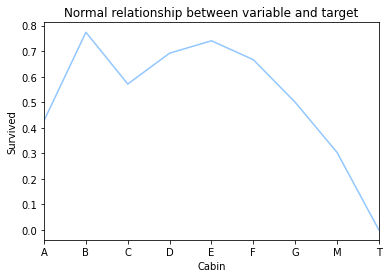

In [56]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

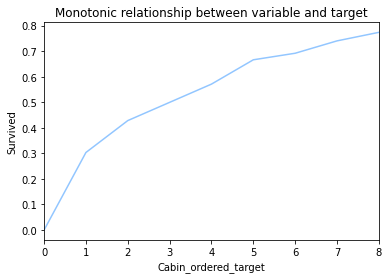

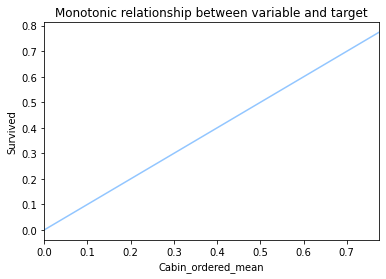

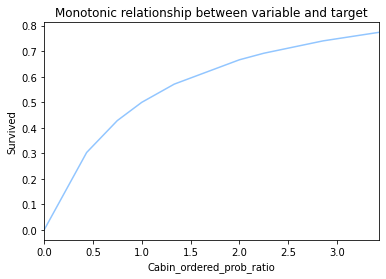

In [57]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered_target'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered_mean'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered_prob_ratio'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

#### ___Weight of Evidence___

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default).

It is computed from the basic odds ratio: ln( (Proportion of Good Credit Outcomes) / (Proportion of Bad Credit Outcomes))

WoE will be 0 if the P(Goods) / P(Bads) = 1. That is, if the outcome is random for that group. If P(Bads) > P(Goods) the odds ratio will be < 1 and the WoE will be < 0; if, on the other hand, P(Goods) > P(Bads) in a group, then WoE > 0.

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:
- It establishes a monotonic relationship to the dependent variable.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables, can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has three drawbacks:
- May incur in loss of information (variation) due to binning to few categories.
- It does not take into account correlation between independent variables
- Prone to cause over-fitting

https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [58]:
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000000,1.000000,0.000000


In [59]:
# Similar steps to get the Probability of Category wrt to the target variable

# since the log of zero is not defined, let's set this number to something small and non-zero
prob_df.loc[prob_df.Survived == 0, 'Survived'] = 0.00001
prob_df

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143
F,0.666667,0.333333,2.000000
G,0.500000,0.500000,1.000000
M,0.303609,0.696391,0.435976
T,0.000010,1.000000,0.000000


In [60]:
# now we calculate the WoE
prob_df['WoE'] = np.log(prob_df.Survived/prob_df.Died)
prob_df

,Survived,Died,ratio,WoE
Cabin,,,,
A,0.428571,0.571429,0.750000,-0.287682
B,0.774194,0.225806,3.428571,1.232144
C,0.571429,0.428571,1.333333,0.287682
D,0.692308,0.307692,2.250000,0.810930
E,0.740741,0.259259,2.857143,1.049822
F,0.666667,0.333333,2.000000,0.693147
G,0.500000,0.500000,1.000000,0.000000
M,0.303609,0.696391,0.435976,-0.830169
T,0.000010,1.000000,0.000000,-11.512925


In [61]:
# and we make a dictionary to map the orignal variable to the WoE
# same as above but we capture the dictionary in a variable

ordered_labels = prob_df['WoE'].to_dict()
ordered_labels

{'A': -0.2876820724517809,
 'B': 1.232143681292632,
 'C': 0.28768207245178085,
 'D': 0.8109302162163288,
 'E': 1.0498221244986774,
 'F': 0.6931471805599452,
 'G': 0.0,
 'M': -0.8301689781242366,
 'T': -11.512925464970229}

In [0]:
# replace the labels with the WoE

X_train['Cabin_ordered_WOE'] = X_train.Cabin.map(ordered_labels)
X_test['Cabin_ordered_WOE'] = X_test.Cabin.map(ordered_labels)

Text(0, 0.5, 'Survived')

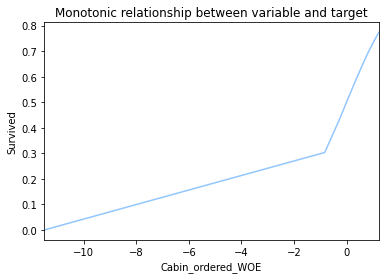

In [63]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered_WOE'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

There is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

Weight of Evidence (WOE) helps to transform a continuous independent variable into a set of groups or bins based on similarity of dependent variable distribution i.e. number of events and non-events.

For continuous independent variables : First, create bins (categories / groups) for a continuous independent variable and then combine categories with similar WOE values and replace categories with WOE values. Use WOE values rather than input values in your model.

For categorical independent variables : Combine categories with similar WOE and then create new categories of an independent variable with continuous WOE values. In other words, use WOE values rather than raw categories in your model. The transformed variable will be a continuous variable with WOE values. It is same as any continuous variable.

___Benefits of WOE___
- It can treat outliers. Suppose you have a continuous variable such as annual salary and extreme values are more than 500 million dollars. These values would be grouped to a class of (let's say 250-500 million dollars). Later, instead of using the raw values, we would be using WOE scores of each classes.
- It can handle missing values as missing values can be binned separately.
- Since WOE Transformation handles categorical variable so there is no need for dummy variables.
- WoE transformation helps you to build strict linear relationship with log odds. Otherwise it is not easy to accomplish linear relationship using other transformation methods such as log, square-root etc. In short, if you would not use WOE transformation, you may have to try out several transformation methods to achieve this.

#### ___Rare Label Encoding___

Categories that are present only in a small proportion of the observations, tend to be grouped into an umbrella category like “Other” or “Rare”. This procedure tends to improve machine learning model generalisation, in particular for tree based methods, and also operationalisation of the models in production.

#### ___Binary Encoding___

In [64]:
!pip install category_encoders

import category_encoders as ce

In [65]:
binenc = ce.BinaryEncoder(handle_missing='return_nan')
binenc.fit(data_embarked)

BinaryEncoder(cols=None, drop_invariant=False, handle_missing='return_nan',
              handle_unknown='value', mapping=None, return_df=True, verbose=0)

In [66]:
data_embarked.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [67]:
binenc.transform(data_embarked)

,Embarked_0,Embarked_1,Embarked_2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,0.0,1.0,0.0


#### ___Sum Encoding___

Just like OneHot except one value is held constant and encoded as -1 across all columns.

In [68]:
ce_sum = ce.SumEncoder()
ce_sum.fit(data_embarked)

SumEncoder(cols=['Embarked'], drop_invariant=False, handle_missing='value',
           handle_unknown='value',
           mapping=[{'col': 'Embarked',
                     'mapping':     Embarked_0  Embarked_1  Embarked_2
 1         1.0         0.0         0.0
 2         0.0         1.0         0.0
 3         0.0         0.0         1.0
 4        -1.0        -1.0        -1.0
-1         0.0         0.0         0.0
-2         0.0         0.0         0.0}],
           return_df=True, verbose=0)

In [69]:
ce_sum.transform(data_embarked)

,intercept,Embarked_0,Embarked_1,Embarked_2
0,1,1.0,0.0,0.0
1,1,0.0,1.0,0.0
2,1,1.0,0.0,0.0
3,1,1.0,0.0,0.0
4,1,1.0,0.0,0.0
...,...,...,...,...
886,1,1.0,0.0,0.0
887,1,1.0,0.0,0.0
888,1,1.0,0.0,0.0
889,1,0.0,1.0,0.0


For More info:

https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

#### ___Category Encoders___

Category Encoders is a library of scikit-learn-compatible categorical variable encoders, such as:

- Ordinal
- One-Hot
- Binary
- Helmert Contrast
- Sum Contrast
- Polynomial Contrast
- Backward Difference Contrast
- Hashing
- BaseN
- LeaveOneOut
- Target Encoding

https://www.kaggle.com/discdiver/category-encoders-examples



```
pip install category_encoders

import category_encoders as ce

encoder = ce.BackwardDifferenceEncoder(cols=[...])
encoder = ce.BaseNEncoder(cols=[...])
encoder = ce.BinaryEncoder(cols=[...])
encoder = ce.CatBoostEncoder(cols=[...])
encoder = ce.HashingEncoder(cols=[...])
encoder = ce.HelmertEncoder(cols=[...])
encoder = ce.JamesSteinEncoder(cols=[...])
encoder = ce.LeaveOneOutEncoder(cols=[...])
encoder = ce.MEstimateEncoder(cols=[...])
encoder = ce.OneHotEncoder(cols=[...])
encoder = ce.OrdinalEncoder(cols=[...])
encoder = ce.SumEncoder(cols=[...])
encoder = ce.PolynomialEncoder(cols=[...])
encoder = ce.TargetEncoder(cols=[...])
encoder = ce.WOEEncoder(cols=[...])

encoder.fit(X, y)
X_cleaned = encoder.transform(X_dirty)
```

